# Exercici 2.3. Visualització de dades sobre dataset penguins.

Importa seaborn com a sns, matplotlib.pyplot com a plt i aplica %matplotlib inline

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

Importa el dataset de seaborn 'penguins'. Anomena'l penguins_df i mostra la informació i la descripció.

In [2]:
# Load penguins dataset and show info/description
penguins_df = sns.load_dataset('penguins')
penguins_df.info()
penguins_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Crea un gràfic de dispersió en 3 dimensions amb les variables:

bill_length_mm, bill_depth_mm, flipper_length_mm

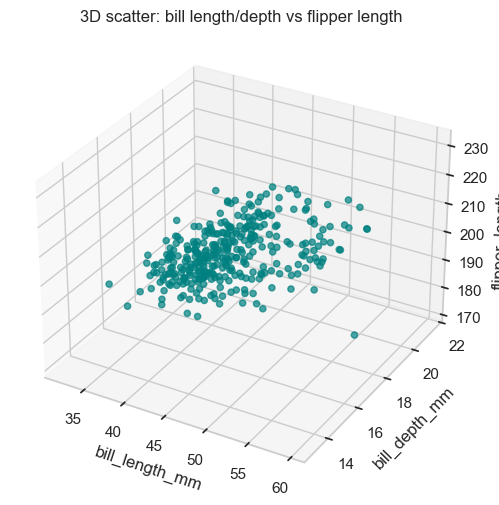

In [3]:
# 3D scatter of bill_length_mm, bill_depth_mm, flipper_length_mm
df3 = penguins_df.dropna(subset=['bill_length_mm','bill_depth_mm','flipper_length_mm'])
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df3['bill_length_mm'], df3['bill_depth_mm'], df3['flipper_length_mm'], c='teal', alpha=0.7)
ax.set_xlabel('bill_length_mm')
ax.set_ylabel('bill_depth_mm')
ax.set_zlabel('flipper_length_mm')
plt.title('3D scatter: bill length/depth vs flipper length')
plt.show()

Visualitza la relació entre flipper_length_mm i body_mass_g, separada per espècie.

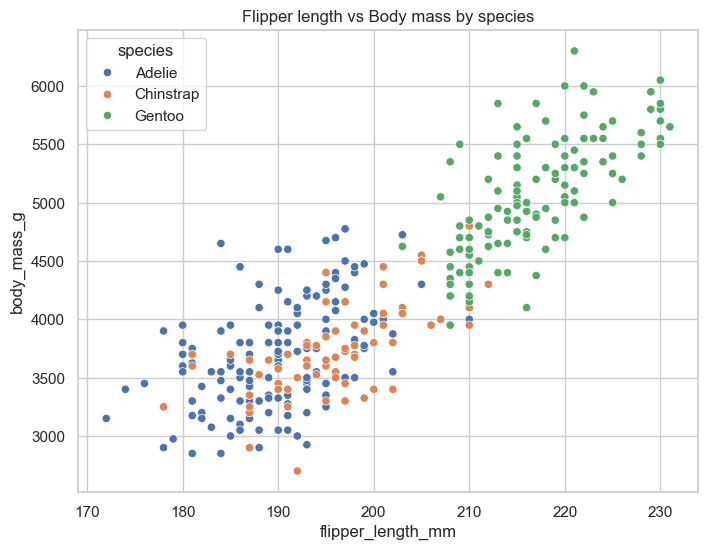

In [4]:
# Relationship between flipper_length_mm and body_mass_g separated by species
plt.figure(figsize=(8,6))
sns.scatterplot(data=penguins_df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.title('Flipper length vs Body mass by species')
plt.show()

Mostra quants pingüins hi ha per espècie i sexe.

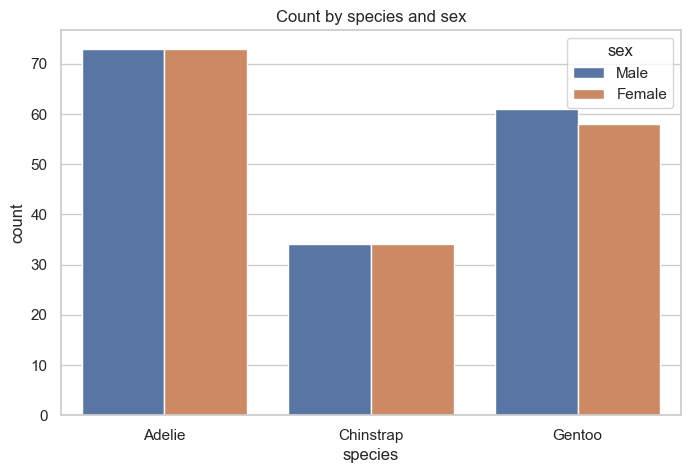

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [5]:
# Count of penguins by species and sex
plt.figure(figsize=(8,5))
sns.countplot(data=penguins_df, x='species', hue='sex')
plt.title('Count by species and sex')
plt.show()
# Also show a table of counts
penguins_df.groupby(['species','sex']).size().unstack(fill_value=0)

Visualitza la distribució dels valors de flipper_length_mm segons l’espècie.

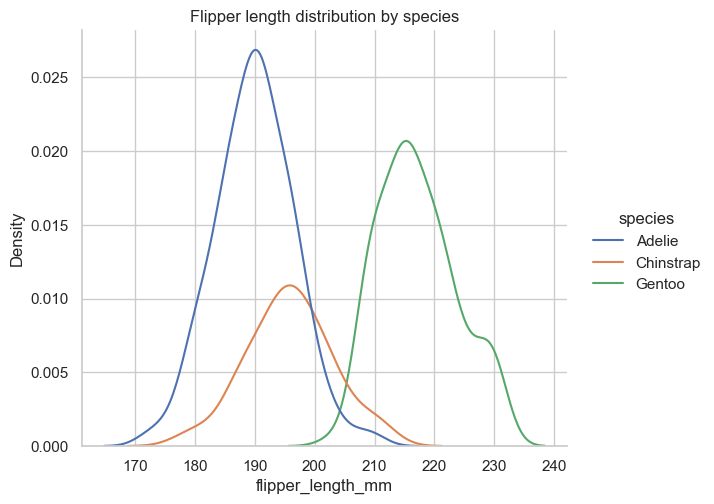

In [6]:
# Distribution of flipper_length_mm by species
sns.displot(data=penguins_df, x='flipper_length_mm', hue='species', kind='kde', height=5, aspect=1.2)
plt.title('Flipper length distribution by species')
plt.show()

Visualitza la variabilitat de body_mass_g segons l’illa d’origen.

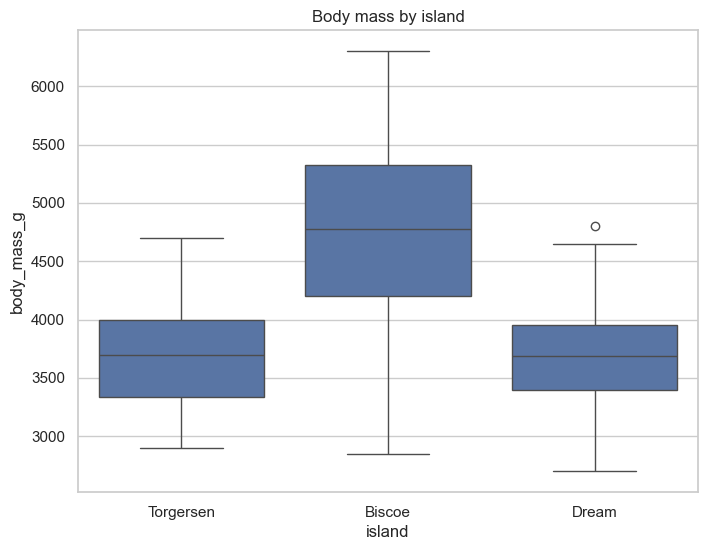

In [7]:
# Variability of body_mass_g by island (boxplot)
plt.figure(figsize=(8,6))
sns.boxplot(data=penguins_df, x='island', y='body_mass_g')
plt.title('Body mass by island')
plt.show()

És similar al boxplot, però mostra més detalls de la distribució.

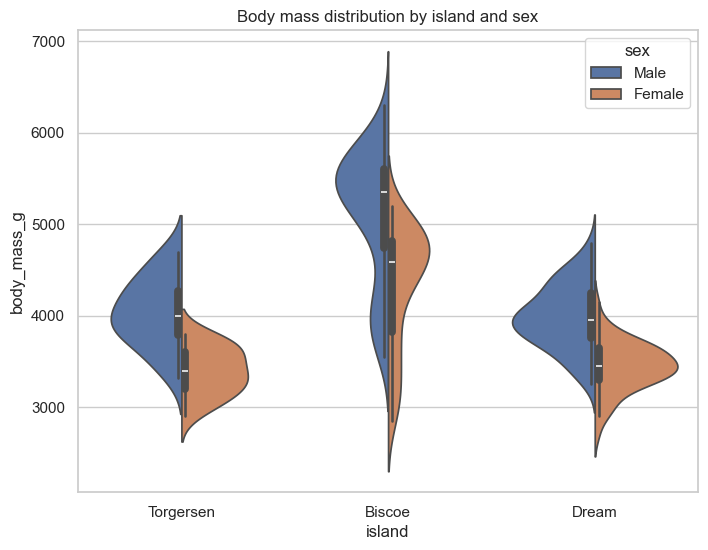

In [8]:
# Violinplot: similar to boxplot but shows kernel density
plt.figure(figsize=(8,6))
sns.violinplot(data=penguins_df, x='island', y='body_mass_g', hue='sex', split=True)
plt.title('Body mass distribution by island and sex')
plt.show()

Comprova la relació entre les variables numèriques.

In [9]:
# Correlation between numeric variables
num_cols = penguins_df.select_dtypes(include=[np.number])
corr = num_cols.corr()
corr

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


Mostra la relació entre flipper_length_mm i body_mass_g per cada espècie, amb un gràfic separat per espècie.

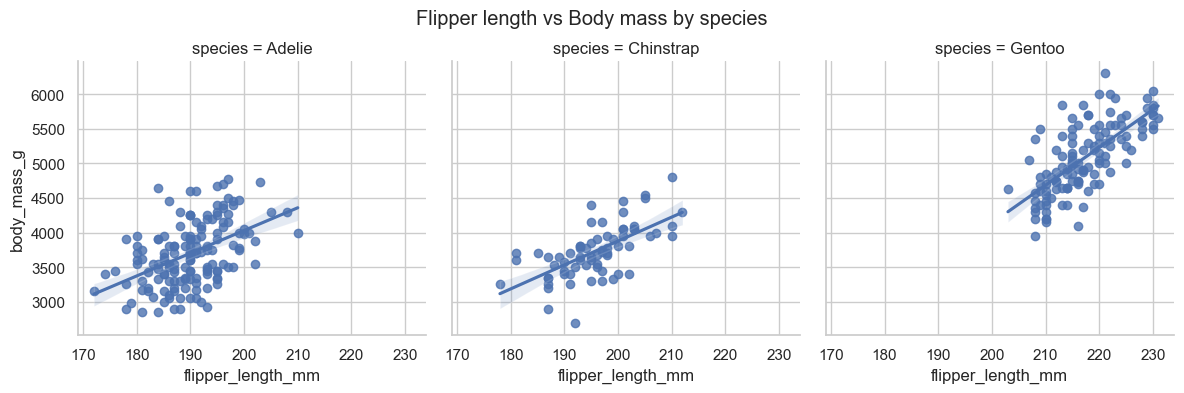

In [10]:
# Flipper length vs body mass per species in separate plots
sns.lmplot(data=penguins_df, x='flipper_length_mm', y='body_mass_g', col='species', height=4, aspect=1)
plt.subplots_adjust(top=0.85)
plt.suptitle('Flipper length vs Body mass by species')
plt.show()

Gràfic de histplot amb múltiples variables

Compara la distribució de la massa corporal per sexe.

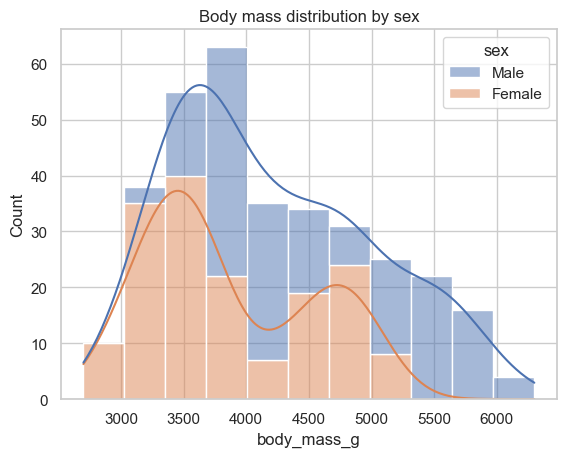

In [11]:
# Histplot comparing body mass distribution by sex
sns.histplot(data=penguins_df, x='body_mass_g', hue='sex', multiple='stack', kde=True)
plt.title('Body mass distribution by sex')
plt.show()

Utilitzant pairplot, genera una visualització comparativa de totes les variables numèriques, separades per espècie.

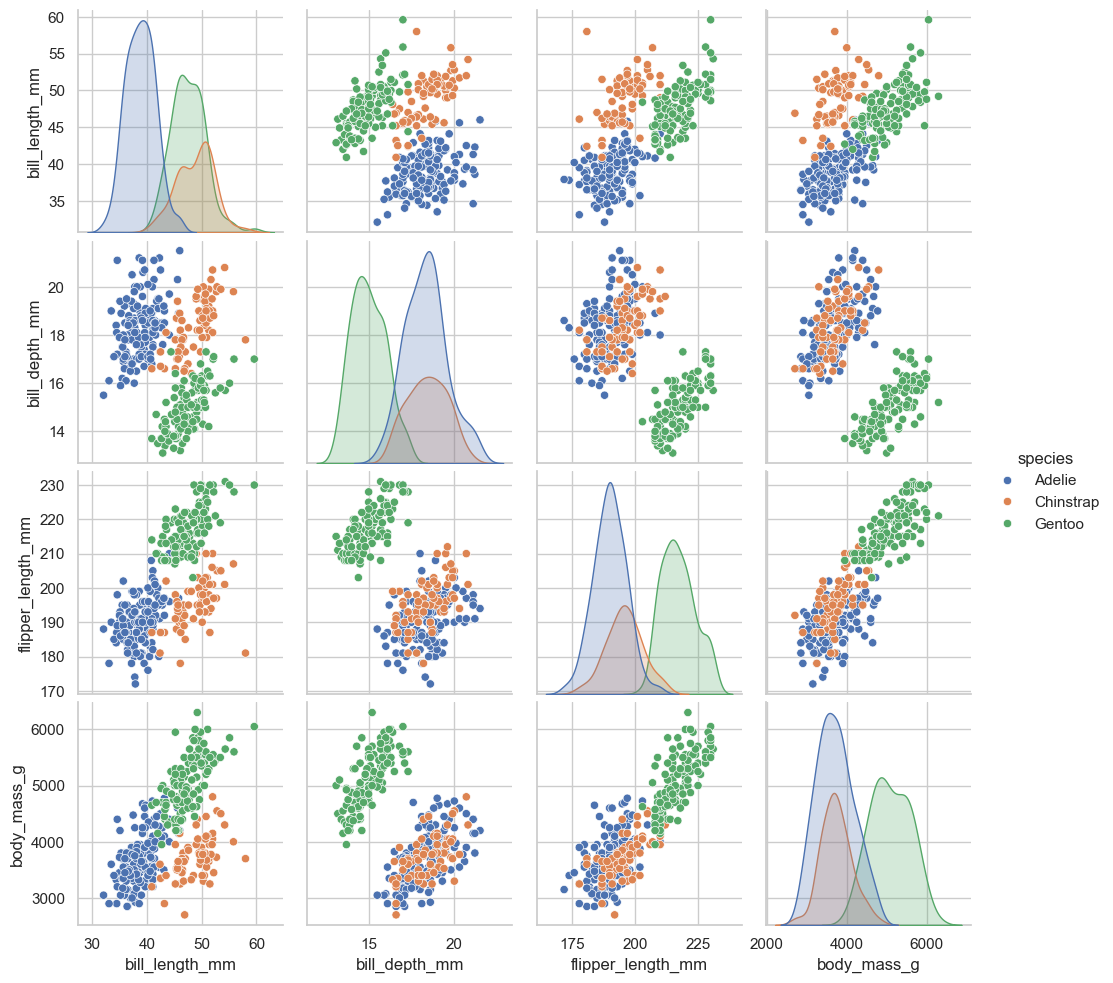

In [12]:
# Pairplot for numeric variables separated by species
sns.pairplot(penguins_df.dropna(), hue='species')
plt.show()